# Spectral Clustering: Cosine similarity for graph construction

Using a method similar to the one we used in the K-means clustering (<b>simulation_kmeans.ipynb</b>),  we can import the data from files, cluster them with spectral clustering and then visualize them in 2-dimensional graphs.

Spectral clustering is a clustering algorithm that operates on a similarity matrix of data points. The basic idea of spectral clustering is to represent the data points in a high-dimensional space, and then use the eigenvectors of the similarity matrix to cluster the data points.

We can calculate the similarity matrix using the cosine similarity measure. The cosine similarity between two vectors is defined as:

$$\cos(\theta) = \frac{A \cdot B}{\|A\| \|B\|}$$

where $\theta$ is the angle between the two vectors, $A$ and $B$ are the two vectors, and $\|A\|$ and $\|B\|$ are the norms of the two vectors.

First, we operate spectral clustering on our datasets with cosine similarity as the similarity measure. Then, we visualize the results in 2-dimensional graphs.

Time for Cosine Similarity on Square Data:  0.03761577606201172
Time for Cosine Similarity on Eliptical Data:  3.7151145935058594


Text(0.5, 1.0, 'Elliptical Data with Cosine Similarity')

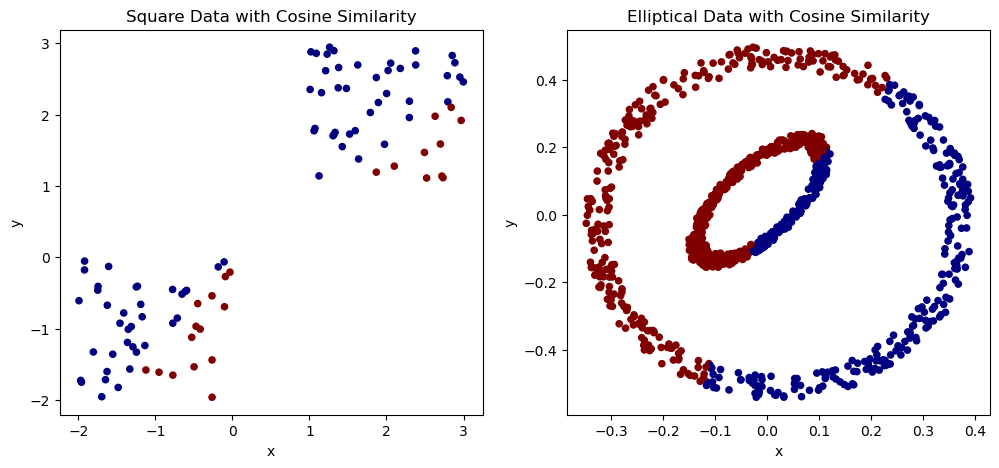

In [1]:
from lib.spectral_clustering import SpectralClustering
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

data_folder = 'data/'
square_df = pd.read_csv(data_folder + 'square.txt', names=['x', 'y'], sep=' ')
elliptical_df = pd.read_csv(data_folder + 'elliptical.txt', names=['x', 'y'], sep=' ')

start = time.time()
sc1 = SpectralClustering(k=2,data=square_df.to_numpy(),similarity='cosine')
result1 = sc1.run(normalize=False)
sc1_time = time.time() - start
sc2 = SpectralClustering(k=2,data=elliptical_df.to_numpy(),similarity='cosine')
result2 = sc2.run(normalize=False)
sc2_time = time.time() - start - sc1_time
print('Time for Cosine Similarity on Square Data: ', sc1_time)
print('Time for Cosine Similarity on Eliptical Data: ', sc2_time)

labels1 = result1.labels
labels2 = result2.labels

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
square_df.plot.scatter(x='x',y='y',c=labels1,colormap='jet',ax=ax1)
ax1.set_title('Square Data with Cosine Similarity')
elliptical_df.plot.scatter(x='x',y='y',c=labels2,colormap='jet',ax=ax2)
ax2.set_title('Elliptical Data with Cosine Similarity')

The results from cosine similarity is not correct for both datasets. This is because the cosine similarity measure treats data points that are far away from each other as similar if they have the same direction. We want to cluster data points that are close to each other as a group, so we need to use a different similarity measure.

# Spectral Clustering: Gaussian kernel similarity for graph construction

Besides cosine similarity, we can also use Gaussian kernel similarity as the similarity measure. The Gaussian kernel similarity is defined as:

$$k(x,y) = \exp(-\frac{||x-y||^2}{2\sigma^2})$$

where $\sigma$ is a parameter that controls the bandwidth of the Gaussian kernel. The Gaussian kernel similarity is a similarity measure that is often used in machine learning. It is also used in spectral clustering.

Similar to the method we used with cosine similarity, we can operate spectral clustering on our datasets with Gaussian kernel similarity as the similarity measure. Then, we visualize the results in 2-dimensional graphs. Here, the $\sigma$ is tested with different values and the appropriate $\sigma$ is chosen. For the square datasets, $\sigma$ is 1. For the elliptical datasets, $\sigma$ is 0.01.

Time for Gaussian Similarity on Square Data:  0.035958290100097656
Time for Gaussian Similarity on Elliptical Data:  3.4534106254577637


Text(0.5, 1.0, 'Elliptical Data with Gaussian Similarity')

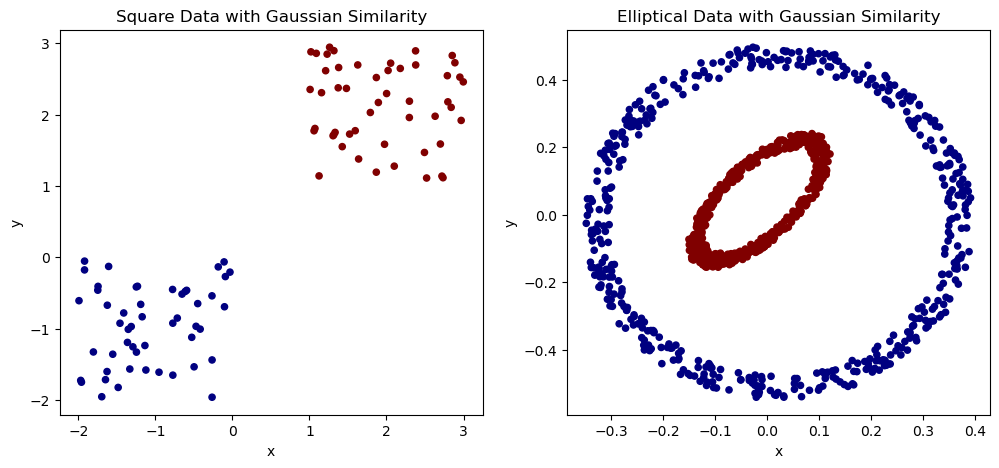

In [2]:

start = time.time()
sc1 = SpectralClustering(k=2,data=square_df.to_numpy(),similarity='gaussian', sigma=1)
result1 = sc1.run(normalize=False)
sc1_time = time.time() - start
sc2 = SpectralClustering(k=2,data=elliptical_df.to_numpy(),similarity='gaussian', sigma=0.01)
result2 = sc2.run(normalize=False)
sc2_time = time.time() - start - sc1_time
print('Time for Gaussian Similarity on Square Data: ', sc1_time)
print('Time for Gaussian Similarity on Elliptical Data: ', sc2_time)

labels1 = result1.labels
labels2 = result2.labels

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
square_df.plot.scatter(x='x',y='y',c=labels1,colormap='jet',ax=ax1)
ax1.set_title('Square Data with Gaussian Similarity')
elliptical_df.plot.scatter(x='x',y='y',c=labels2,colormap='jet',ax=ax2)
ax2.set_title('Elliptical Data with Gaussian Similarity')


We see that Spectral Clustering with Gaussian kernel similarity gives better results than Spectral Clustering with cosine similarity. This is because the Gaussian kernel similarity measure treats data points that are far away from each other as dissimilar.

# Spectral Clustering: The effect of $\sigma$ and normalization on the Gaussian kernel similarity

We can see that the Gaussian kernel similarity is more sensitive to the parameter $\sigma$. We can visualize the effect of $\sigma$ on the Gaussian kernel similarity. The Gaussian kernel similarity is plotted against the $\sigma$ value. Here, we vary the $\sigma$ value from 0.01 to 1.0 in logarithmic scale.

We can also see the effect of normalization on the Gaussian kernel similarity. The normalization happens when at the calculation of the Laplacian matrix after the similarity matrix is calculated. The normalization function is defined as:

$$\text{normalize}(L) = D^{-1/2} L D^{-1/2}$$

where $D$ is the diagonal matrix of the degree matrix of the graph. The degree matrix is defined as:

$$D = \begin{bmatrix} d_1 & 0 & \cdots & 0 \\ 0 & d_2 & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & d_n \end{bmatrix}$$

where $d_i$ is the degree of the $i$-th node. The degree of a node is the number of edges that connect to the node. The edge weights are the values from the similarity matrix. The normalization function is used to make the Laplacian matrix more stable.

Time for Gaussian Similarity with Normaliation on Elliptical Data with Sigma = 0.01:  3.4002814292907715
Time for Gaussian Similarity without Normaliation on Elliptical Data with Sigma = 0.01:  3.40211820602417
Time for Gaussian Similarity with Normaliation on Elliptical Data with Sigma = 1:  3.4048454761505127
Time for Gaussian Similarity without Normaliation on Elliptical Data with Sigma = 1:  3.680420160293579
Time for Gaussian Similarity with Normaliation on Elliptical Data with Sigma = 100:  3.295605421066284
Time for Gaussian Similarity without Normaliation on Elliptical Data with Sigma = 100:  3.4611213207244873
Time for Gaussian Similarity with Normaliation on Elliptical Data with Sigma = 10000:  3.334749698638916
Time for Gaussian Similarity without Normaliation on Elliptical Data with Sigma = 10000:  3.4119367599487305


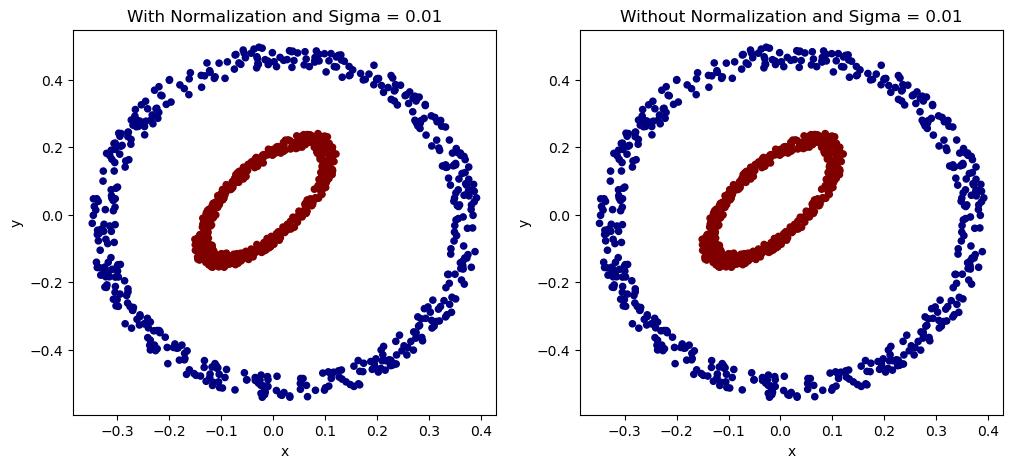

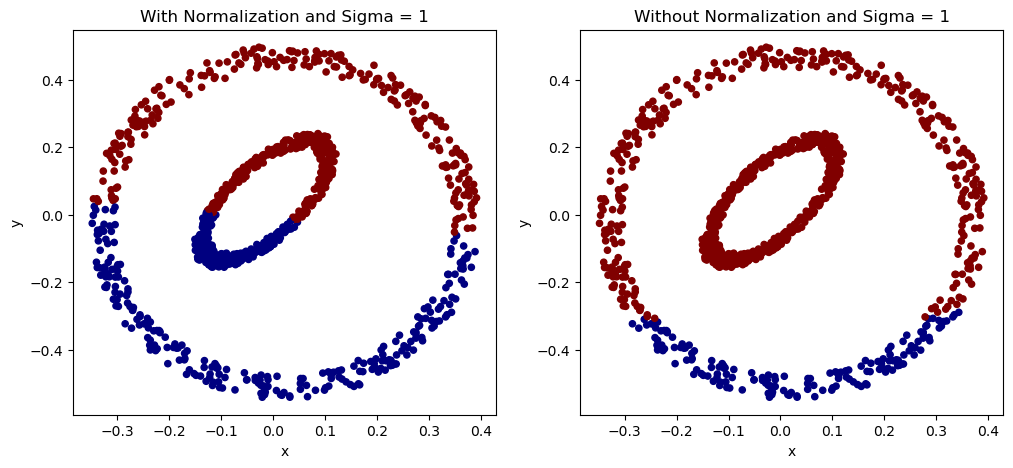

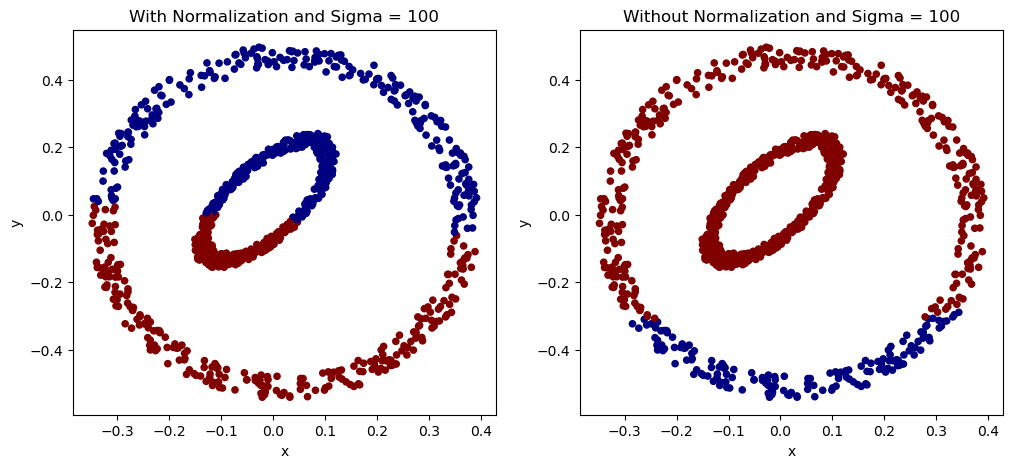

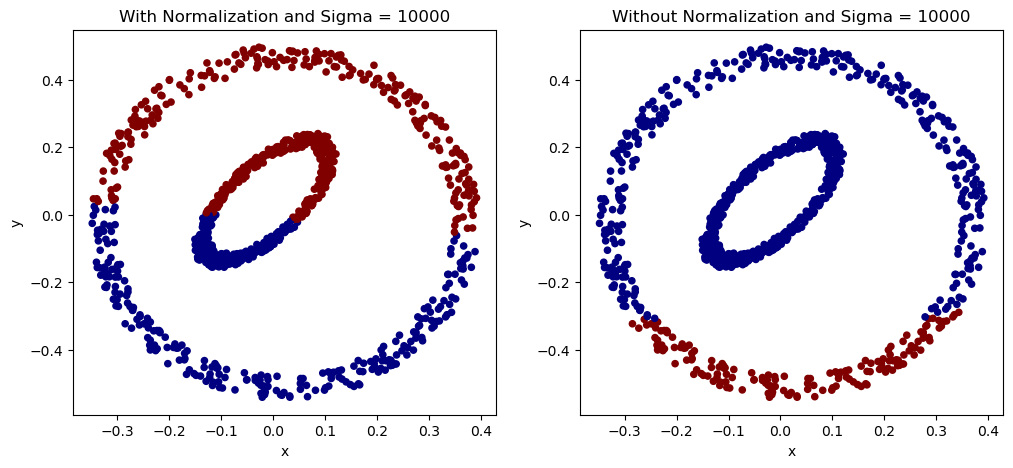

In [3]:
sc1_time_arr = []
sc2_time_arr = []
for sigma in [0.01, 1, 100, 10000]:
    start = time.time()
    sc1 = SpectralClustering(k=2,data=elliptical_df.to_numpy(),similarity='gaussian', sigma=sigma)
    result1 = sc1.run(normalize=True)
    sc1_time = time.time() - start
    sc2 = SpectralClustering(k=2,data=elliptical_df.to_numpy(),similarity='gaussian', sigma=sigma)
    result2 = sc2.run(normalize=False)
    sc2_time = time.time() - start - sc1_time
    print('Time for Gaussian Similarity with Normaliation on Elliptical Data with Sigma = ' + str(sigma) + ': ', sc1_time)
    print('Time for Gaussian Similarity without Normaliation on Elliptical Data with Sigma = ' + str(sigma) + ': ', sc2_time)
    sc1_time_arr.append(sc1_time)
    sc2_time_arr.append(sc2_time)

    labels1 = result1.labels
    labels2 = result2.labels

    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    elliptical_df.plot.scatter(x='x',y='y',c=labels1,colormap='jet',ax=ax1)
    ax1.set_title('With Normalization and Sigma = ' + str(sigma))
    elliptical_df.plot.scatter(x='x',y='y',c=labels2,colormap='jet',ax=ax2)
    ax2.set_title('Without Normalization and Sigma = ' + str(sigma))

# Execution Time

We plot the execution time of the Spectral Clustering algorithm with and without normalization.

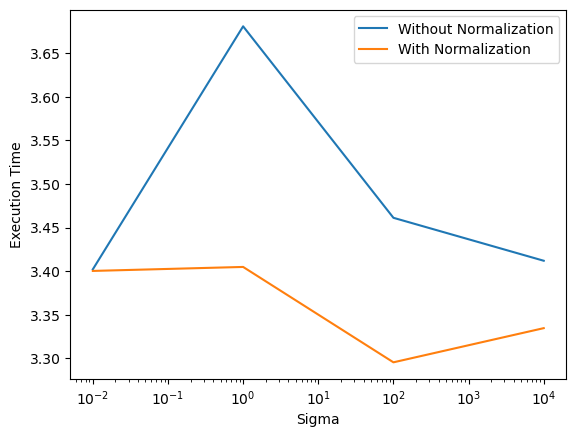

In [4]:
plt.plot([0.01, 1, 100, 10000], sc2_time_arr, label='Without Normalization')
plt.plot([0.01, 1, 100, 10000], sc1_time_arr, label='With Normalization')
plt.gca().axes.get_xaxis().set_ticks([0.01, 1, 100])
plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('Execution Time')
plt.legend()
plt.show()
